# What Is Multicollinearity?

What Is Multicollinearity?
Multicollinearity occurs when two or more independent variables (features) in a regression model are highly linearly correlated. This means one feature can be nearly predicted from another.



# How Multicollinearity Impacts Linear Regression
1- Unstable Coefficients
The model struggles to determine how much each feature independently contributes to the outcome.

Small changes in data can cause large swings in coefficient values.

2- Inflated Standard Errors

Leads to wider confidence intervals.

Coefficients may appear statistically insignificant (high p-values), even if they are meaningful.

Reduces Interpretability

It becomes difficult to explain the individual effect of correlated features.

Can Lead to Overfitting

The model might capture noise rather than true patterns when fitted to training data.



How to Detect Multicollinearity
1. Correlation Matrix
Shows pairwise correlations.

Use: pandas.DataFrame.corr()

Look for correlation coefficients close to ±1.



 How to Address Multicollinearity
1. Drop One of the Correlated Variables
Especially if two variables are nearly duplicates.

2. Combine Features
Average or create a domain-specific composite.

3. Principal Component Regression (PCR)
Use PCA to project features onto orthogonal components.

4. Regularization Techniques
Ridge Regression (L2): Reduces coefficient magnitude, especially useful when features are correlated.

Lasso Regression (L1): Encourages sparsity and can zero out some coefficients.

ElasticNet: Hybrid of L1 and L2.

# Example with sythetic data

Step 1: Simulate Data with Multicollinearity

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set seed for reproducibility
np.random.seed(42)

# Create features
n_samples = 100
X1 = np.random.normal(0, 1, n_samples)
X2 = X1 + np.random.normal(0, 0.1, n_samples)  # Highly correlated with X1
X3 = np.random.normal(0, 1, n_samples)

# Target variable
y = 3 * X1 + 2 * X3 + np.random.normal(0, 1, n_samples)

# DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})


In [2]:
df

,X1,X2,X3
0,0.496714,0.355177,0.357787
1,-0.138264,-0.180329,0.560785
2,0.647689,0.613417,1.083051
3,1.523030,1.442802,1.053802
4,-0.234153,-0.250282,-1.377669
...,...,...,...
95,-1.463515,-1.424983,-0.692910
96,0.296120,0.207735,0.899600
97,0.261055,0.276428,0.307300
98,0.005113,0.010934,0.812862


Step 2: Detect Multicollinearity

In [3]:
#Correlation Matrix
print("Correlation Matrix:")
print(df.corr().round(2))


Correlation Matrix:
      X1    X2    X3
X1  1.00  0.99  0.19
X2  0.99  1.00  0.19
X3  0.19  0.19  1.00


tep 3: Compare Regression Models

In [4]:
from sklearn.model_selection import train_test_split

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

# Models
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1)
}

# Fit and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Regression:")
    print(" Coefficients:", model.coef_)
    print(f" MSE: {mse:.4f}\n")


Linear Regression:
 Coefficients: [ 3.80115314 -0.97243535  2.01337108]
 MSE: 0.6841

Ridge Regression:
 Coefficients: [1.9991372  0.83238686 1.98484509]
 MSE: 0.6401

Lasso Regression:
 Coefficients: [2.74898842 0.         1.93906204]
 MSE: 0.6641



# Observations:
Linear Regression will likely show unstable coefficients for X1 and X2.

Ridge Regression stabilizes them by shrinking.

Lasso may set one of the correlated variables’ coefficients to 0 (feature selection).

# Visualize Coefficients

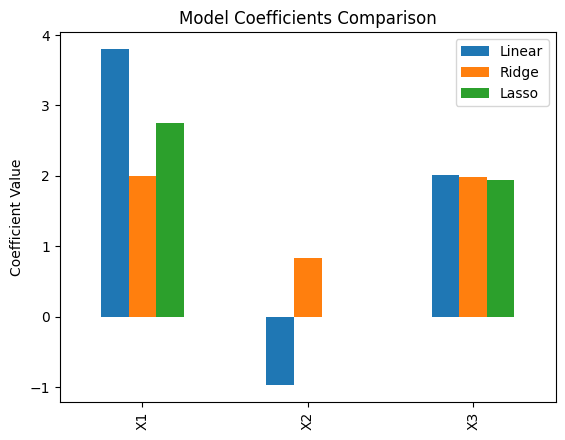

In [5]:
coef_df = pd.DataFrame({name: model.coef_ for name, model in models.items()}, index=df.columns)
coef_df.plot(kind='bar')
plt.title("Model Coefficients Comparison")
plt.ylabel("Coefficient Value")
plt.show()
